In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv(r'C:\Users\admin\Downloads\Chronic-Kidney-Diseases-Prediction-master\Chronic-Kidney-Diseases-Prediction-master\project\input\raw/data.csv')

In [3]:
data.head(10)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [4]:
data["GFR"]=175*data["sc"]-1.154* data["age"]-0.203*0.742

In [5]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,GFR
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,7800,5.2,yes,yes,no,good,no,no,ckd,154.457374
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,6000,NaN,no,no,no,good,no,no,ckd,131.771374
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,7500,NaN,no,yes,no,poor,no,yes,ckd,243.301374
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,609.457374
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,7300,4.6,no,no,no,good,no,no,ckd,185.995374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,6700,4.9,no,no,no,good,no,no,notckd,23.879374
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,7800,6.2,no,no,no,good,no,no,notckd,161.381374
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,6600,5.4,no,no,no,good,no,no,notckd,91.001374
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,7200,5.9,no,no,no,good,no,no,notckd,155.231374


In [6]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification', 'GFR'],
      dtype='object')

In [7]:
for i in data.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,GFR
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,374.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,474.910556
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,1011.463180
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,3.107374
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,107.150374
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,168.692374
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,419.791374
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,13230.609374


In [10]:
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [11]:
data.drop('id',axis=1,inplace=True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,GFR
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,7800,5.2,yes,yes,no,good,no,no,yes,154.457374
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,6000,NaN,no,no,no,good,no,no,yes,131.771374
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500,NaN,no,yes,no,poor,no,yes,yes,243.301374
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700,3.9,yes,no,no,poor,yes,yes,yes,609.457374
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300,4.6,no,no,no,good,no,no,yes,185.995374


In [12]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease',"GFR"]
data.columns=feature_names

In [13]:
for i in data.columns:
    print("unique values in {}:\n".format(i),data[i].unique())

unique values in Age (yrs):
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in Blood Pressure (mm/Hg):
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in Albumin:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in Red Blood Cells:
 [nan 'normal' 'abnormal']
unique values in Pus Cells:
 ['normal' 'abnormal' nan]
unique values in Pus Cell Clumps:
 ['notpresent' 'present' nan]
unique values in Bacteria:
 ['notpresent' 'present' nan]
unique values in Blood Glucose Random (mgs/dL):
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99.

In [14]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [15]:
for col in mistyped:
        data[col]=data[col].astype('float')

In [16]:
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [18]:
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('Chronic Kidney Disease')

In [19]:
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

In [20]:
import matplotlib.style as style
style.use('fivethirtyeight')

In [21]:
n_rows, n_cols = (5,2)

In [22]:
n_rows

5

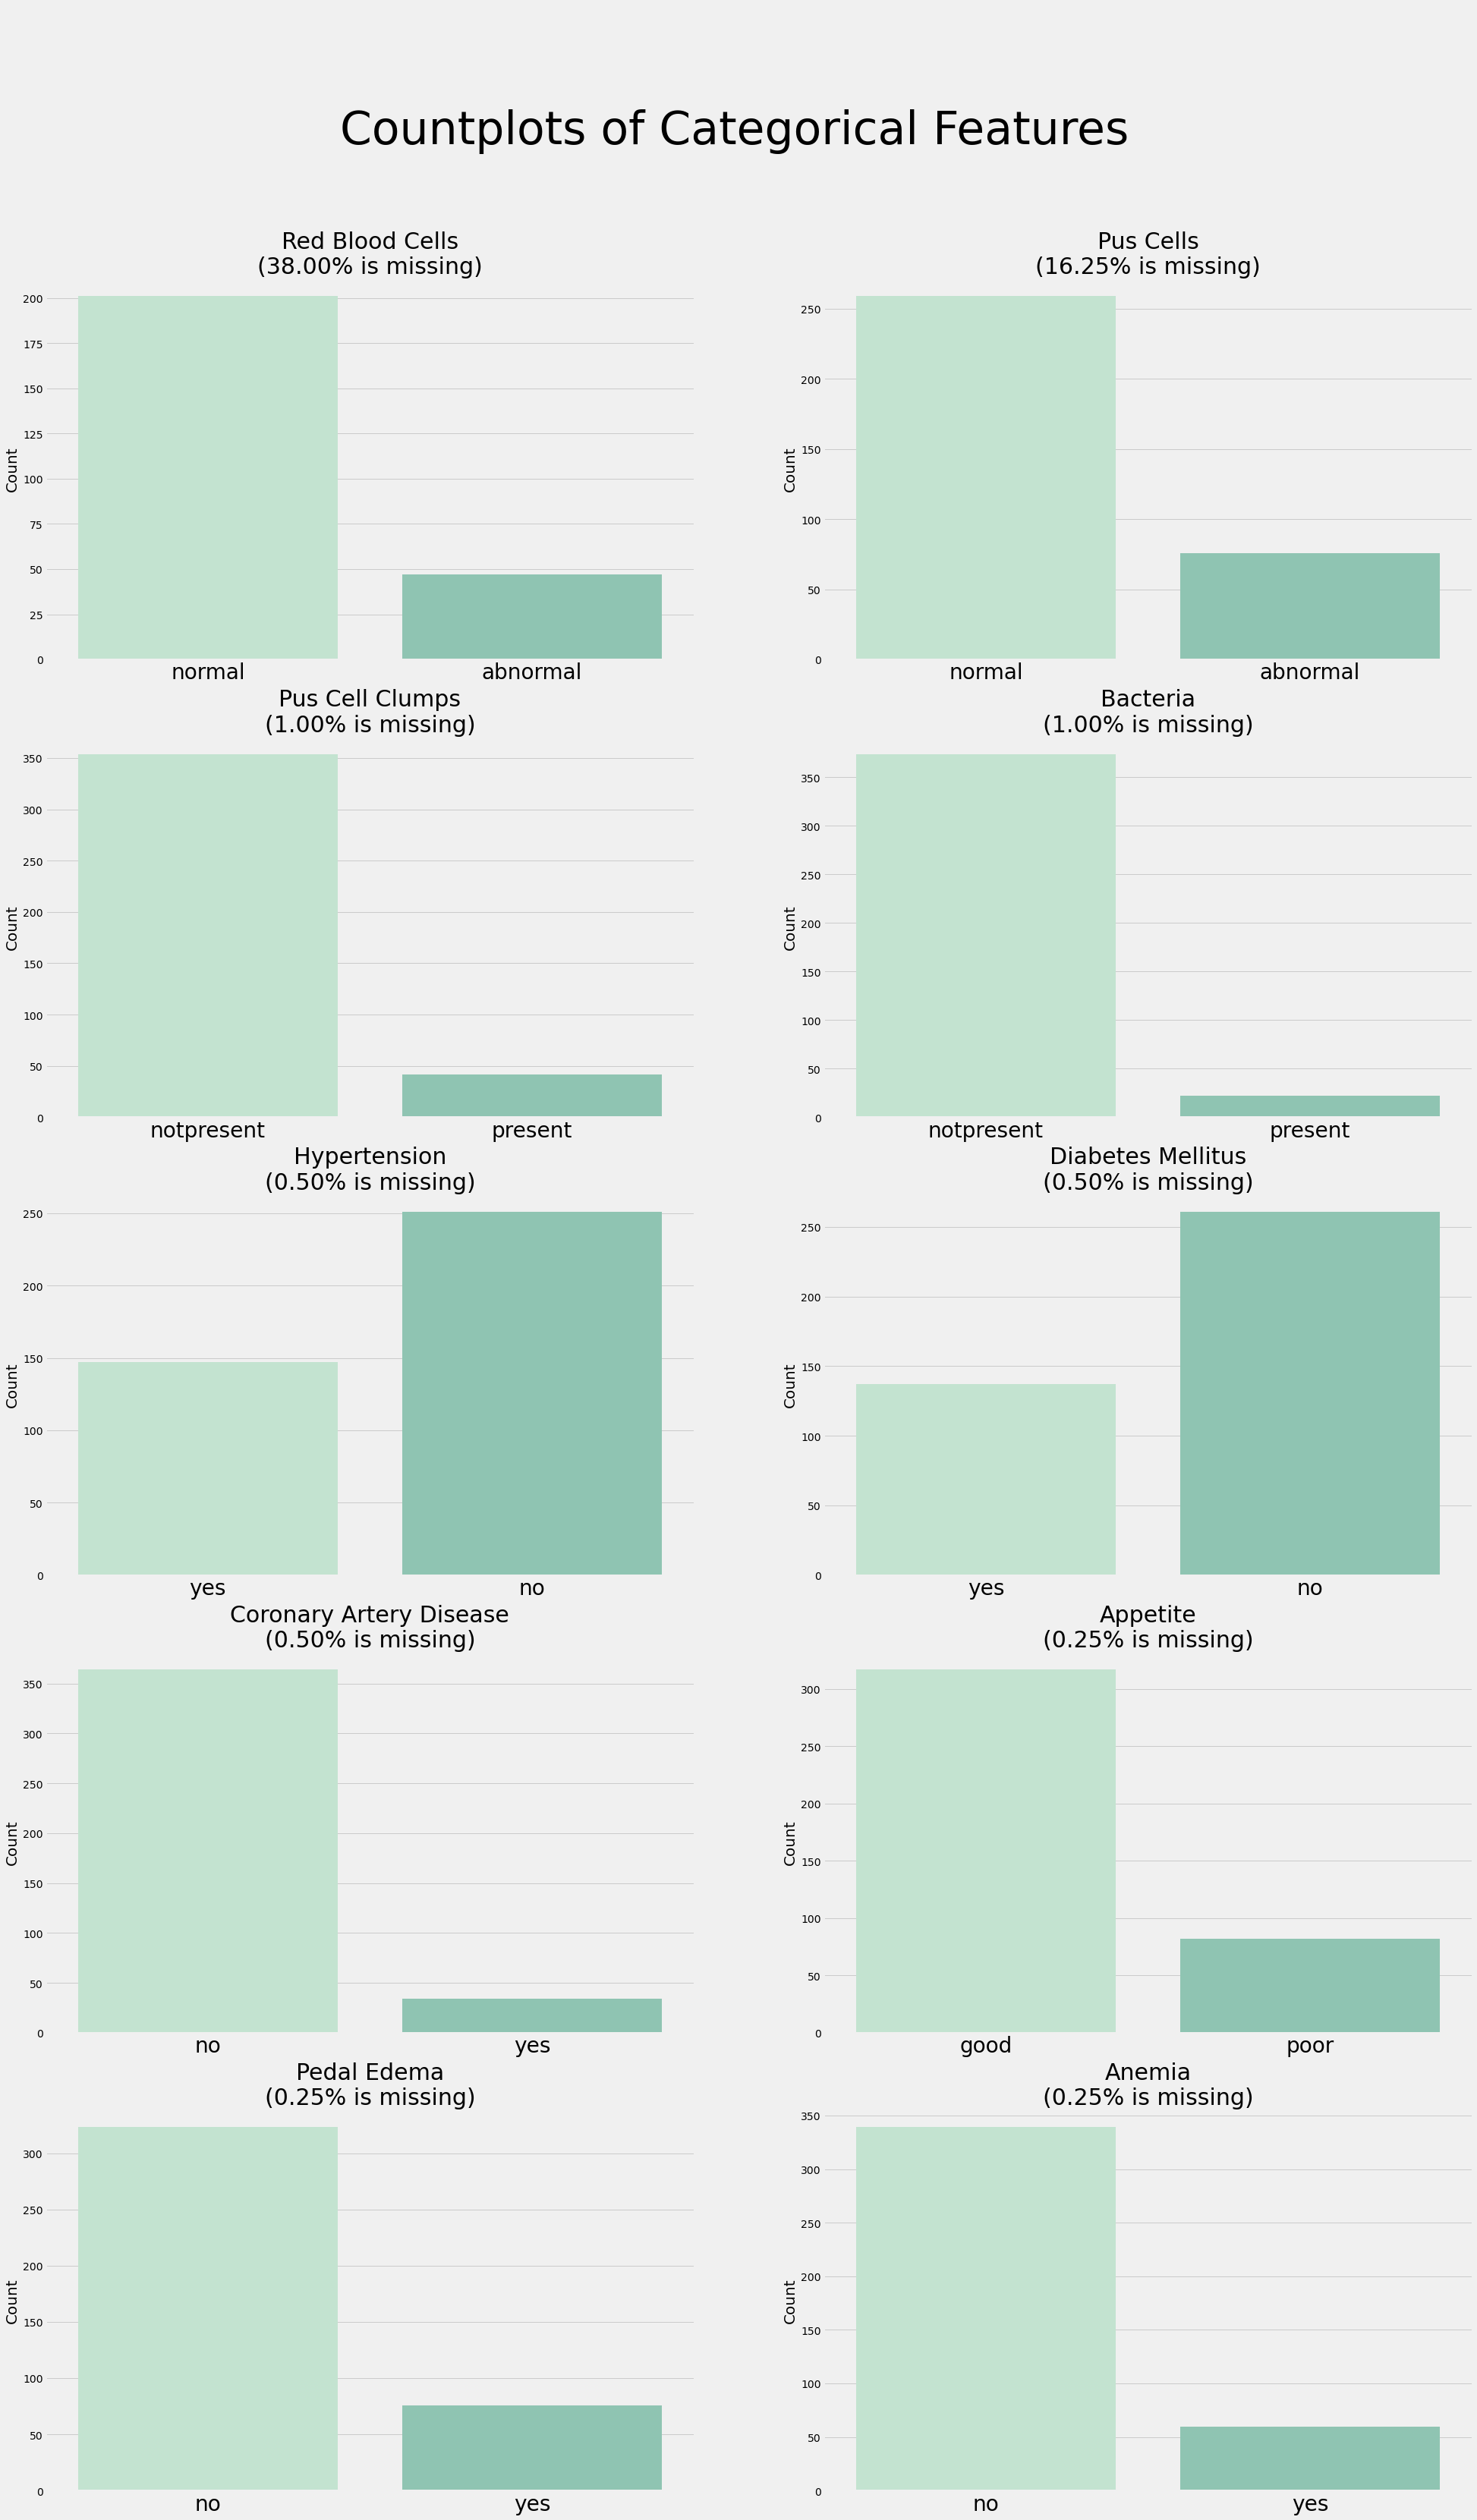

In [23]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=data,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=30)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=20)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=28)
    

plt.show()
    

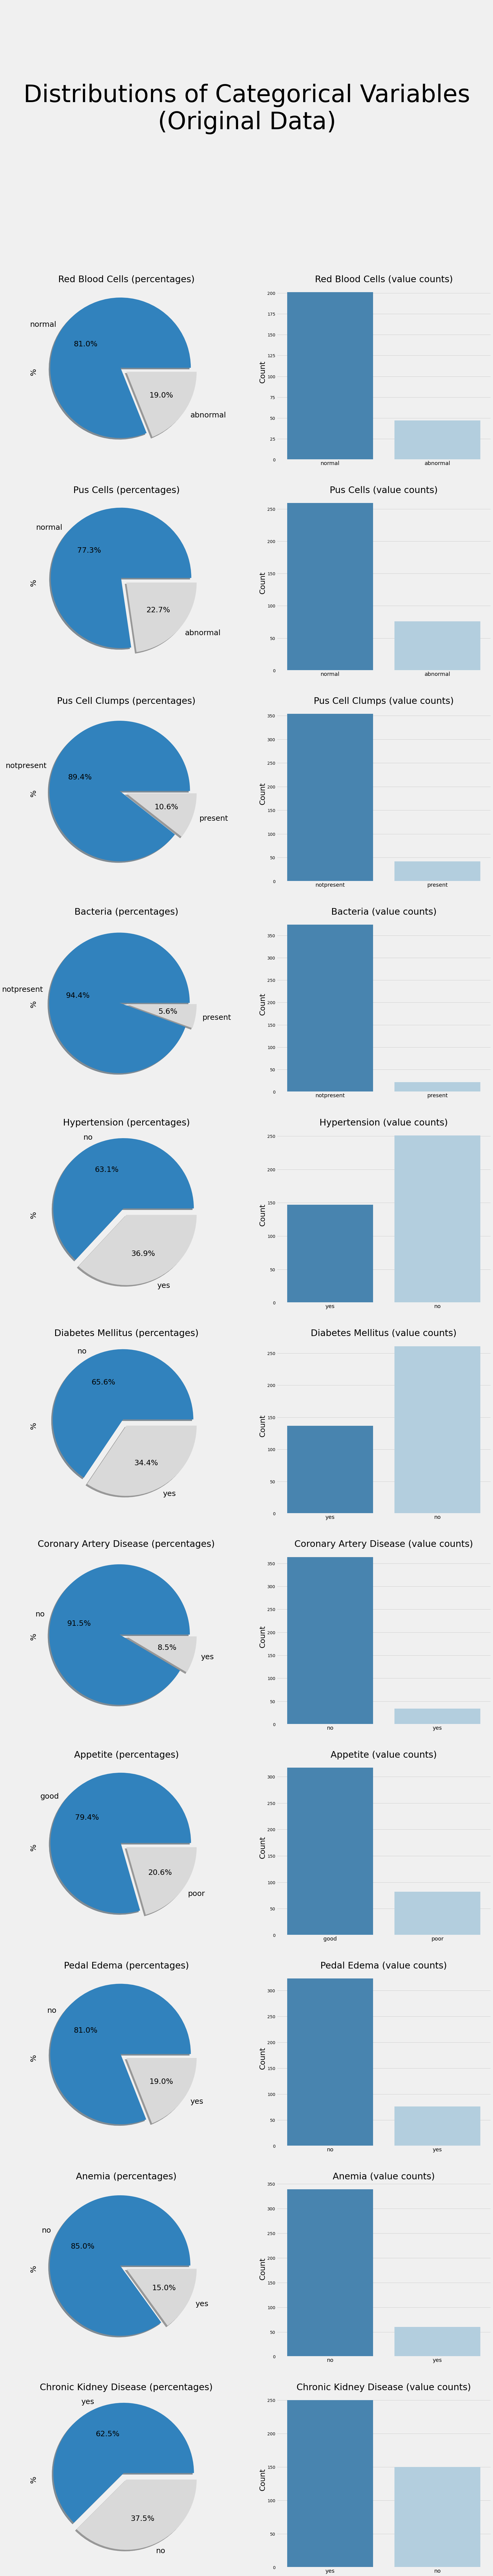

In [24]:
n_rows, n_cols = (11,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 130))
figure.suptitle('\n\n\nDistributions of Categorical Variables\n(Original Data)', fontsize=80)

for i in range(len(categoricals)):
    column=categoricals[i]
    graph1=data[column].value_counts().plot.pie(autopct='%1.1f%%',
                                                      ax=axes[i,0],
                                                      colormap="tab20c",
                                                      fontsize=25,
                                                      shadow=True,
                                                      explode=[0.1,0])
    axes[i,0].set_ylabel('%',fontsize=25)
    axes[i,0].set_title(column+' (percentages)', fontsize=30)
    graph2=sns.countplot(x=column,
                         data=data,
                         palette='Blues_r',
                         ax=axes[i,1])
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=25)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels(), Fontsize=18)
    axes[i,1].set_title(column+' (value counts)', fontsize=30)
    

graph1=data['Chronic Kidney Disease'].value_counts().plot.pie(autopct='%1.1f%%',
                                                              ax=axes[10,0],
                                                              colormap='tab20c',
                                                              fontsize=25,
                                                              shadow=True,
                                                              explode=[0.1,0])
axes[10,0].set_ylabel("%",fontsize=25)
axes[10,0].set_title('Chronic Kidney Disease (percentages)',fontsize=30)


graph2=sns.countplot(x='Chronic Kidney Disease',
                     data=data,
                     palette='Blues_r',
                     ax=axes[10,1])

axes[10,1].set_xlabel(None,fontsize=25)
axes[10,1].set_ylabel("Count",fontsize=25)
axes[10,1].set_xticklabels(axes[10,1].get_xticklabels(), Fontsize=18)
axes[10,1].set_title('Chronic Kidney Disease (value counts)', fontsize=30)

plt.show()

In [26]:
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))
figure.suptitle('\n\nNumerical Features\nVS\nTarget Variable', fontsize=60)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    bp=sns.boxenplot(y=column, x='Chronic Kidney Disease', data=data, color="paleturquoise",
    
    ax=axes[i,j])
        
    axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=25)

    axes[i,j].set_ylabel(column,fontsize=25)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),fontsize=20)

plt.show()

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_11016/2828695325.py, line 16)

In [27]:
sns.set(context='notebook', style=None, palette='muted')

In [28]:
data.rename(columns={'Chronic Kidney Disease' : 'class'}, inplace=True)
data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,class,GFR
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,7800.0,5.2,yes,yes,no,good,no,no,yes,154.457374
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,6000.0,NaN,no,no,no,good,no,no,yes,131.771374
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500.0,NaN,no,yes,no,poor,no,yes,yes,243.301374
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700.0,3.9,yes,no,no,poor,yes,yes,yes,609.457374
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300.0,4.6,no,no,no,good,no,no,yes,185.995374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,6700.0,4.9,no,no,no,good,no,no,no,23.879374
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,7800.0,6.2,no,no,no,good,no,no,no,161.381374
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,6600.0,5.4,no,no,no,good,no,no,no,91.001374
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,7200.0,5.9,no,no,no,good,no,no,no,155.231374


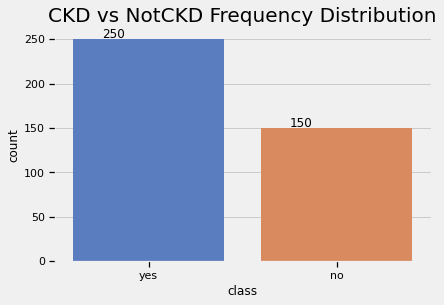

In [29]:
ax = sns.countplot(data = data, x ='class')
ax.set_title('CKD vs NotCKD Frequency Distribution', fontsize=20)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

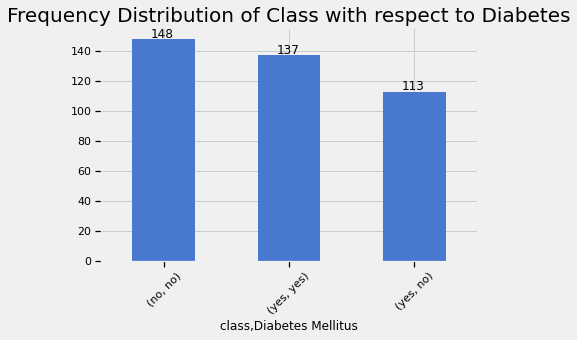

In [30]:
ax = data['Diabetes Mellitus'].groupby(data['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Diabetes', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

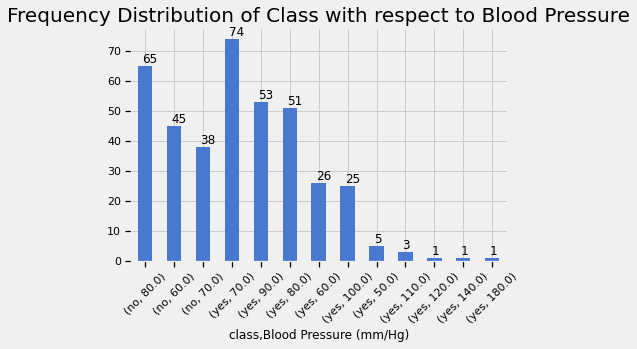

In [31]:
ax = data['Blood Pressure (mm/Hg)'].groupby(data['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Blood Pressure', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

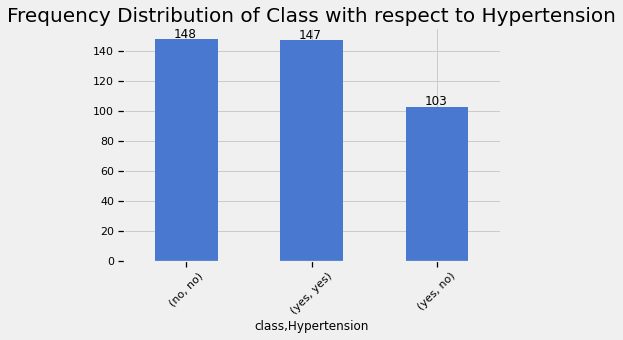

In [32]:
ax = data['Hypertension'].groupby(data['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Hypertension', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [33]:
data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,class,GFR
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,7800.0,5.2,yes,yes,no,good,no,no,yes,154.457374
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,6000.0,NaN,no,no,no,good,no,no,yes,131.771374
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500.0,NaN,no,yes,no,poor,no,yes,yes,243.301374
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700.0,3.9,yes,no,no,poor,yes,yes,yes,609.457374
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300.0,4.6,no,no,no,good,no,no,yes,185.995374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,6700.0,4.9,no,no,no,good,no,no,no,23.879374
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,7800.0,6.2,no,no,no,good,no,no,no,161.381374
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,6600.0,5.4,no,no,no,good,no,no,no,91.001374
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,7200.0,5.9,no,no,no,good,no,no,no,155.231374


In [34]:
data.columns

Index(['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin',
       'Sugar', 'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
       'Appetite', 'Pedal Edema', 'Anemia', 'class', 'GFR'],
      dtype='object')

In [35]:
data['class'] = data['class'].replace({'ckd':1,'notckd':0})
data['Hypertension'] = data['Hypertension'].replace({'yes':1,'no':0})
data['Diabetes Mellitus'] = data['Diabetes Mellitus'].replace({'yes':1,'no':0})
data['Coronary Artery Disease'] = data['Coronary Artery Disease'].replace({'yes':1,'no':0})
data['Appetite'] = data['Appetite'].replace({'good':1,'poor':0})
data['Anemia'] = data['Anemia'].replace({'yes':1,'no':0})
data['Pedal Edema'] = data['Pedal Edema'].replace({'yes':1,'no':0})
data['Bacteria'] = data['Bacteria'].replace({'present':1,'notpresent':0})
data['Pus Cell Clumps'] = data['Pus Cell Clumps'].replace({'present':1,'notpresent':0})
data['Pus Cells'] = data['Pus Cells'].replace({'abnormal':1,'normal':0})
data['Red Blood Cells'] = data['Red Blood Cells'].replace({'abnormal':1,'normal':0})

In [36]:
data.columns

Index(['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin',
       'Sugar', 'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
       'Appetite', 'Pedal Edema', 'Anemia', 'class', 'GFR'],
      dtype='object')

Factors that may increase your risk of chronic kidney disease include:

- Diabetes - su(blood sugar), dm (diabetes mellitus)
- High blood pressure - BP
- Heart and blood vessel (cardiovascular) disease
- Smoking
- Obesity
- Being African-American, Native American or Asian-American
- Family history of kidney disease
- Abnormal kidney structure
- Older age - age

In [37]:
data['class']=data['class'].replace(to_replace={'yes':1.0,'yes\t':1.0,'no':0.0,'no':0.0})

In [38]:
data.columns

Index(['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin',
       'Sugar', 'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
       'Appetite', 'Pedal Edema', 'Anemia', 'class', 'GFR'],
      dtype='object')

In [39]:
data.dropna(inplace=True)

In [40]:


X = data.drop(['class'], axis = 1)
y = data['class']

In [41]:
y

3      1.0
9      1.0
11     1.0
14     1.0
20     1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 158, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [43]:
from sklearn import metrics
scores = []
models = []

In [46]:
#Support Vector Machines
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)

y_pred = svc.predict(x_test)

svc_score = metrics.accuracy_score(y_pred, y_test) * 100
scores.append(svc_score)
models.append('SVM Classifier')

from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix1)

[[29  0]
 [ 1 10]]


In [47]:
#Caluclating Accuracy
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svc.score(x_test, y_test)))

Accuracy of SVM classifier on test set: 0.97


In [48]:
#Caluclating Precision and F-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        29
         1.0       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)



knn.fit(x_train, y_train)

knn_preds = knn.predict(x_test)


knn_score = metrics.accuracy_score(y_test, knn_preds) * 100
scores.append(knn_score)
models.append('K-Nearest Neighbors Classifier')

print('K-Nearest Neighbors Classifier Accuracy = ', knn_score)


K-Nearest Neighbors Classifier Accuracy =  95.0


In [52]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(x_train,y_train)

predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("DecisionTrees's Accuracy is: ", x*100)

dct_score = metrics.accuracy_score(y_test, predicted_values) * 100
scores.append(dct_score)
models.append('Decision Tree Classifier')


print(classification_report(y_test,predicted_values))

print('Precision: %.3f' %metrics.recall_score(y_test, predicted_values, labels=[0,1], average='micro'))
print('Recall: %.3f' %metrics.precision_score(y_test, predicted_values, labels=[0,1], average='macro'))
print('F1_Score: %.3f' %metrics.f1_score(y_test, predicted_values, average='weighted'))

DecisionTrees's Accuracy is:  97.5
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        29
         1.0       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40

Precision: 0.975
Recall: 0.983
F1_Score: 0.975


In [53]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)

random_score = metrics.accuracy_score(y_test, predicted_values) * 100
scores.append(random_score)
models.append('random forestTree')

print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.975
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        29
         1.0       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



<AxesSubplot:title={'center':'Accuracy Comparison 80% Train and 20% Test Dataset'}, xlabel='Accuracy', ylabel='Algorithm'>

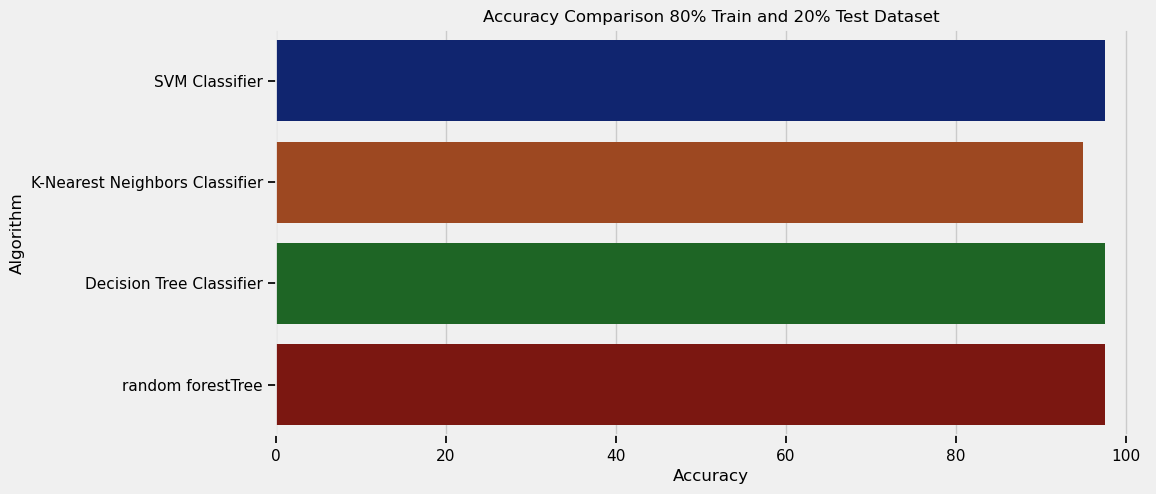

In [54]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison 80% Train and 20% Test Dataset')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = scores,y = models,palette='dark')